# **Week 3: Challenge Activity Part 1**
In this lab work, we will applying LIME to explain black-box image classifiers.
<br>
<br>
**LIME**<br>
Generally, deep learning models are much more efficient than conventional ML models on image data as these models have the ability to perform auto feature extraction. They can extract complex low-level features such as stripes, edges, contours, corners and motifs, and even higher-level features such as larger shapes and certain parts of the object. These higher-level features are usually referred to as Regions of Interest (RoI) in the image, or superpixels, as they are collections of pixels of the image that cover a particular area of the image. Now, the low-level features are not human-interpretable, but the high-level features are human-interpretable, as any non-technical end user will relate to the images with respect to the higher-level features. LIME also works in a similar fashion. The algorithm tries to highlight the superpixels in images that contribute positively or negatively to the model's decision-making process hence providing explainability. Further information : [LIME GitHub](https://github.com/marcotcr/lime)
<br>
<br>
**Please download shark image file from [Task 3 in Challenge Activity](https://canvas.hull.ac.uk/courses/75587/discussion_topics/481340?module_item_id=1375372) and save your Gdrive.**

In [1]:
# Install the following libraries your local environment, if not already installed.
!pip install lime

In [2]:
# Importing necessary libararies

import warnings
warnings.filterwarnings("ignore")
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as c_map
from IPython.display import Image, display
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.xception import Xception, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

import lime
from lime import lime_image
from lime import submodular_pick

import logging
logging.getLogger('lime').setLevel(logging.CRITICAL)

from skimage.segmentation import mark_boundaries

np.random.seed(123)

## **Loading the data**
Since we are more interested to check how black-box image classifiers can be explained using LIME, we will focus only on the inference part. Let us load any generic image data. For this example, we will take the data from this source: https://i.imgur.com/1Phh6hv.jpeg

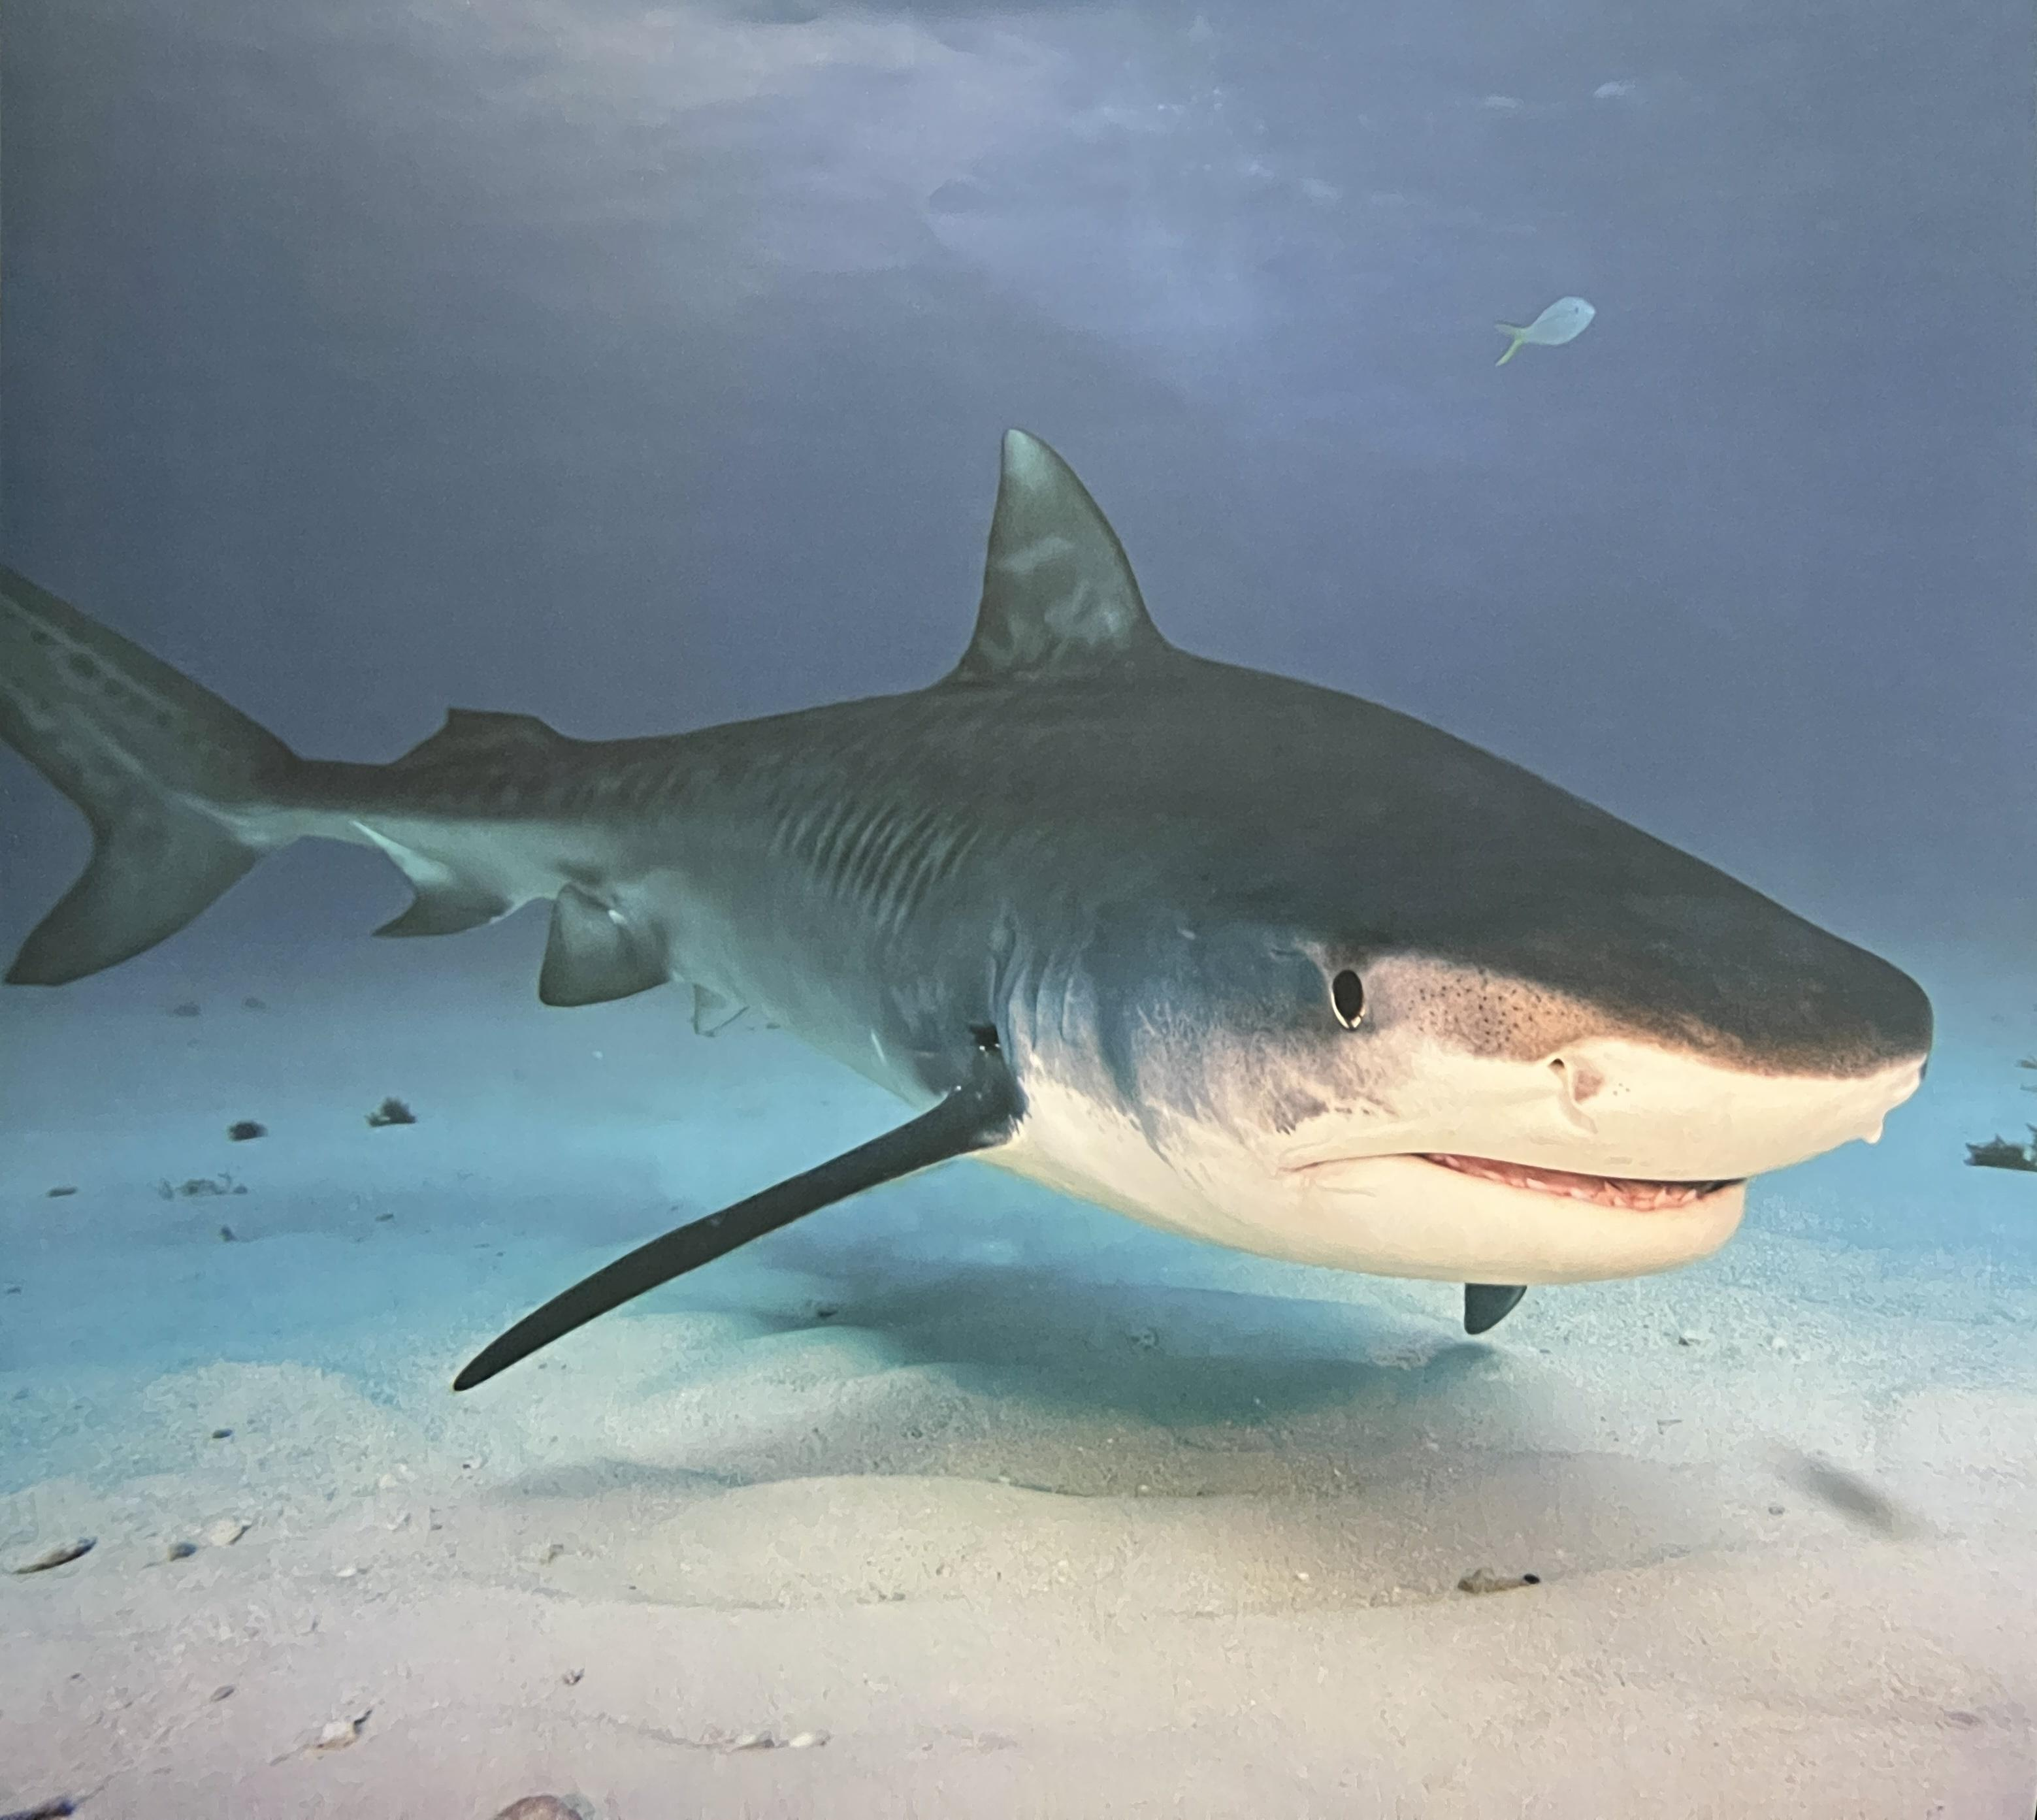

In [3]:
image_path = "c:/users/hlmas/Desktop/MSc/Ethics/MSc-Ethics/shark.jpg" # Please change your filepath you saved the data.
IMG_SIZE = (299, 299)

# Display the image.
display(Image(filename=image_path, width=IMG_SIZE[0], height=IMG_SIZE[1]))

In [4]:
def transform_image(image_path, size):
    '''
    Function to transform an image to normalized numpy array
    '''
    img = image.load_img(image_path, target_size=size)
    img = image.img_to_array(img)# Transforming the image to get the shape as [channel, height, width]
    img = np.expand_dims(img, axis=0) # Adding dimension to convert array into a batch of size (1,299,299,3)
    img = img/255 # normalizing the image to keep within the range of 0.0 to 1.0
    return img

# use this with Xception and Inception models
normalized_img = transform_image(image_path, IMG_SIZE)

## **Defining the model**
For this example, we are not training a model from scratch, but rather defining a pretrained Tensorflow Xception model as our black-box Deep Learning model which we will be explaining using the LIME framework.

In [5]:
# Define and initialise a model.
Xmodel = Xception(weights="imagenet")

In [6]:
# Get predictions
Xpredictions = Xmodel.predict(normalized_img)

# Decode top 5 predictions
Xdecoded = decode_predictions(Xpredictions, top=5)[0]

# Display results
print("Top 5 predictions with Xception model:")
for i, (imagenet_id, label, score) in enumerate(Xdecoded):
    print(f"{i+1}. {label}: {score*100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 951ms/step
Top 5 predictions with Xception model:
1. tiger_shark: 93.33%
2. great_white_shark: 0.57%
3. hammerhead: 0.12%
4. scuba_diver: 0.09%
5. sturgeon: 0.07%


The image is predicted as Tiger Shark which is the correct prediction and the black-box model is successfully able to give the correct prediction. Now, let us even take a look at the top 5 predictions along with the model confidence.

In [7]:
top5_pred = decode_predictions(Xpredictions, top=5)[0]

As we see, although the model is well trained to produce the correct prediction, but there are chances that the model is not just looking into main object in the image but as well as the surrounding background. This is evident from the prediction of scuba_driver present in the top 5 prediction list. So, it is important for us understand, the key components or parts of the image the model is looking into to make the prediction.

# **Model Explanation with LIME**
Now, we will use the LIME framework to identify "super-pixels" or image segments used by the model to predict the outcome.

In [8]:
explainer = lime_image.LimeImageExplainer()

In [9]:
exp = explainer.explain_instance(normalized_img[0],
                                 Xmodel.predict,
                                 top_labels=5,
                                 hide_color=0, # color code to mask
                                 num_samples=1000) # number of pertutated images

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 877ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 868ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 835ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 918ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 959ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 881ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 865ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 914ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 867ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 877ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 858ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 791ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 807ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 845ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 776ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 855ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 850ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 851ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 907ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 866ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 809ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 875ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 864ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

Our explainer object is ready, but let us visualize the various explanation segments created by the LIME algorithm.

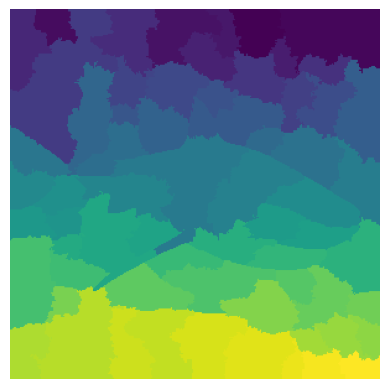

In [10]:
plt.imshow(exp.segments)
plt.axis('off')
plt.savefig('xception_segments')
plt.show()

Now, let us use the top segments or super pixels to identify the region of interest of the image used by the model to make its prediction.

In [11]:
def generate_prediction_sample(exp, exp_class, ax=None, weight = 0.1, show_positive = True, hide_background = True):
    '''
    Method to display and highlight super-pixels used by the black-box model to make predictions
    '''
    image, mask = exp.get_image_and_mask(exp_class,
                                         positive_only=show_positive,
                                         num_features=6, # number of super-pixels
                                         hide_rest=hide_background,
                                         min_weight=weight
                                        )
    if ax is None:
        plt.imshow(mark_boundaries(image, mask))
        plt.axis('off')
        plt.show()
    else:
        ax.imshow(mark_boundaries(image, mask))
        ax.axis('off')



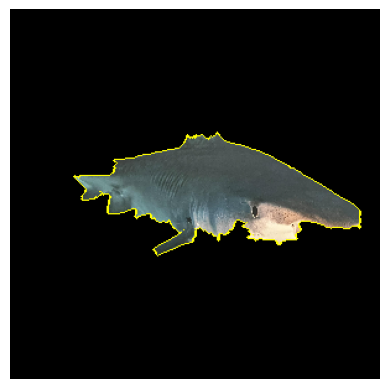

In [12]:
generate_prediction_sample(exp, exp.top_labels[0], show_positive = True, hide_background = True)

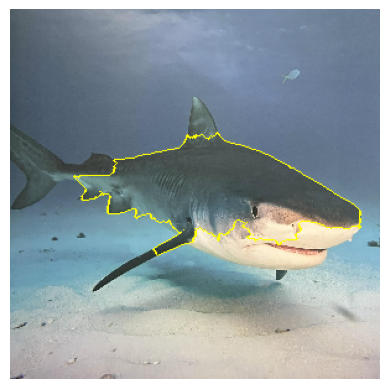

In [13]:
generate_prediction_sample(exp, exp.top_labels[0], show_positive = True, hide_background = False)

As we can see from the above image that the model was able to identify the correct region, which does indicate the correct prediction of the outcome by the model.

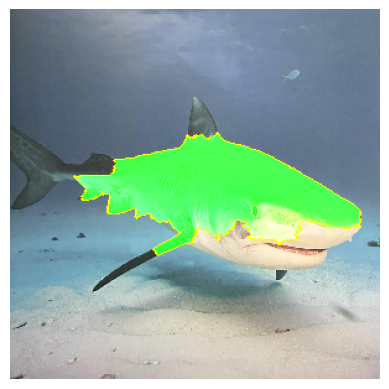

In [14]:
generate_prediction_sample(exp, exp.top_labels[0], show_positive = False, hide_background = False)

The above samples show us how we can hide or show the background along with the super-pixels or even outline or highlight the super-pixels to identify the region of interest used by the model to make the prediction. What we see from here does make sense, and does allow us to increase trust towards black-box models. We can also form a heat-map to show how important each super-pixel is to get some more granular explaianbility.

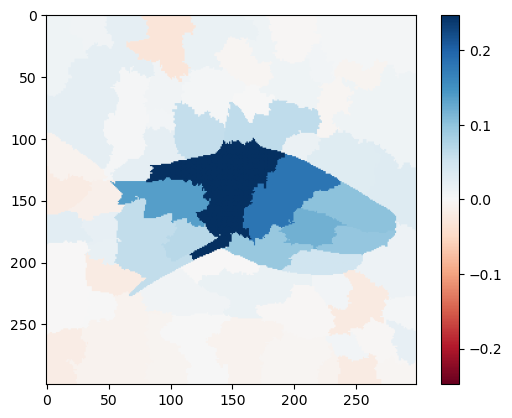

In [15]:
def explanation_heatmap(exp, exp_class, ax=None):
    '''
    Using heat-map to highlight the importance of each super-pixel for the model prediction
    '''
    dict_heatmap = dict(exp.local_exp[exp_class])
    heatmap = np.vectorize(dict_heatmap.get)(exp.segments)
    
    # Use provided axis or create new one
    if ax is None:
        plt.imshow(heatmap, cmap='RdBu', vmin=-heatmap.max(), vmax=heatmap.max())
        plt.colorbar()
        plt.show()
    else:
        im = ax.imshow(heatmap, cmap='RdBu', vmin=-heatmap.max(), vmax=heatmap.max())
        ax.axis('off')
        return im  # Return image for colorbar

explanation_heatmap(exp, exp.top_labels[0])

We can clearly identify the most influential segments used by the model to make the prediction using this heatmap visualization. Now, let try to perform the same steps for another explanation class and see if the results are different.

In [16]:
index = 2
print(f"We will deal with predicted class: {top5_pred[index][1]}")

We will deal with predicted class: hammerhead


We will deal with predicted class: hammerhead

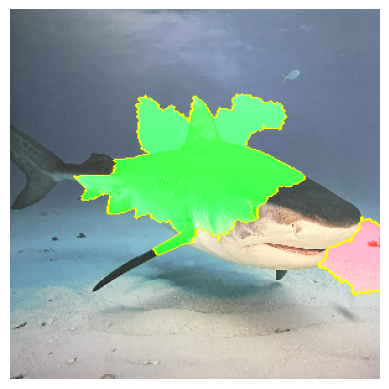

In [17]:
generate_prediction_sample(exp, exp.top_labels[index], weight = 0.0001, show_positive = False, hide_background = False)

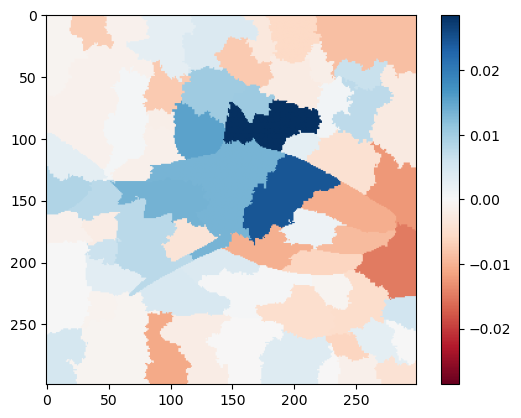

In [18]:
explanation_heatmap(exp, exp.top_labels[index])

In this case, we are trying to find out what made the model predict the outcome as hammerhead shark. When we used the LIME explaianbility methods, the visualizations clearly show that the middle part of the shark along with its fin, does contribute positively towards predicting the outcome as hammerhead shark, but the face and the front part contribute negatively towards the prediction. This is quite consistent with our human knowledge as well. Hammerhead Sharks are also sharks, so the middle part and the fin looks similar to Tiger Sharks but the face or the front portion of the hammerhead sharks looks like the shape of a hammer, which is significantly different from that of a tiger shark.

# **Task**
Try with pretrained Tensorflow models (ResNet50, VGG16, VGG19, InceptionV3 and others), observe and analyse different outcomes.Refer: https://keras.io/api/applications/ to see differnet pretrained Tensorflow model

#### Using ResNet50

In [19]:
import keras
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

resnet_model = ResNet50(weights='imagenet')

resnet_img = keras.utils.load_img(image_path, target_size=(224, 224))
resnet_img = keras.utils.img_to_array(resnet_img)
resnet_img = np.expand_dims(resnet_img, axis=0)
resnet_img = preprocess_input(resnet_img)

In [20]:
# Get predictions
resnet_predictions = resnet_model.predict(resnet_img)

# Decode top 5 predictions
resnet_decoded = decode_predictions(resnet_predictions, top=5)[0]

# Display results
print("Top 5 predictions with ResNet model:")
for i, (imagenet_id, label, score) in enumerate(resnet_decoded):
    print(f"{i+1}. {label}: {score*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Top 5 predictions with ResNet model:
1. tiger_shark: 95.24%
2. great_white_shark: 4.53%
3. hammerhead: 0.22%
4. sturgeon: 0.01%
5. coho: 0.00%


In [21]:
resnet_top5_pred = decode_predictions(resnet_predictions, top=5)[0]

In [22]:
explainer = lime_image.LimeImageExplainer()

In [23]:
exp = explainer.explain_instance(resnet_img[0],
                                 resnet_model.predict,
                                 top_labels=5,
                                 hide_color=0, # color code to mask
                                 num_samples=1000) # number of pertutated images

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

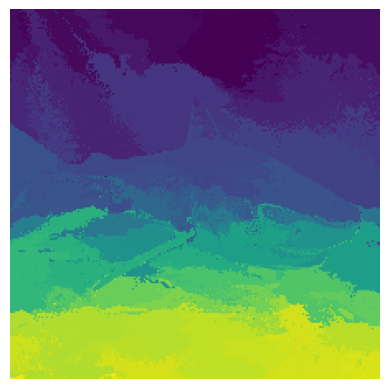

In [24]:
plt.imshow(exp.segments)
plt.axis('off')
plt.savefig('resnet_segments')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-69.68000030517578..132.22100830078125].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-69.68000030517578..132.22100830078125].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-76.68000030517578..66.06099700927734].


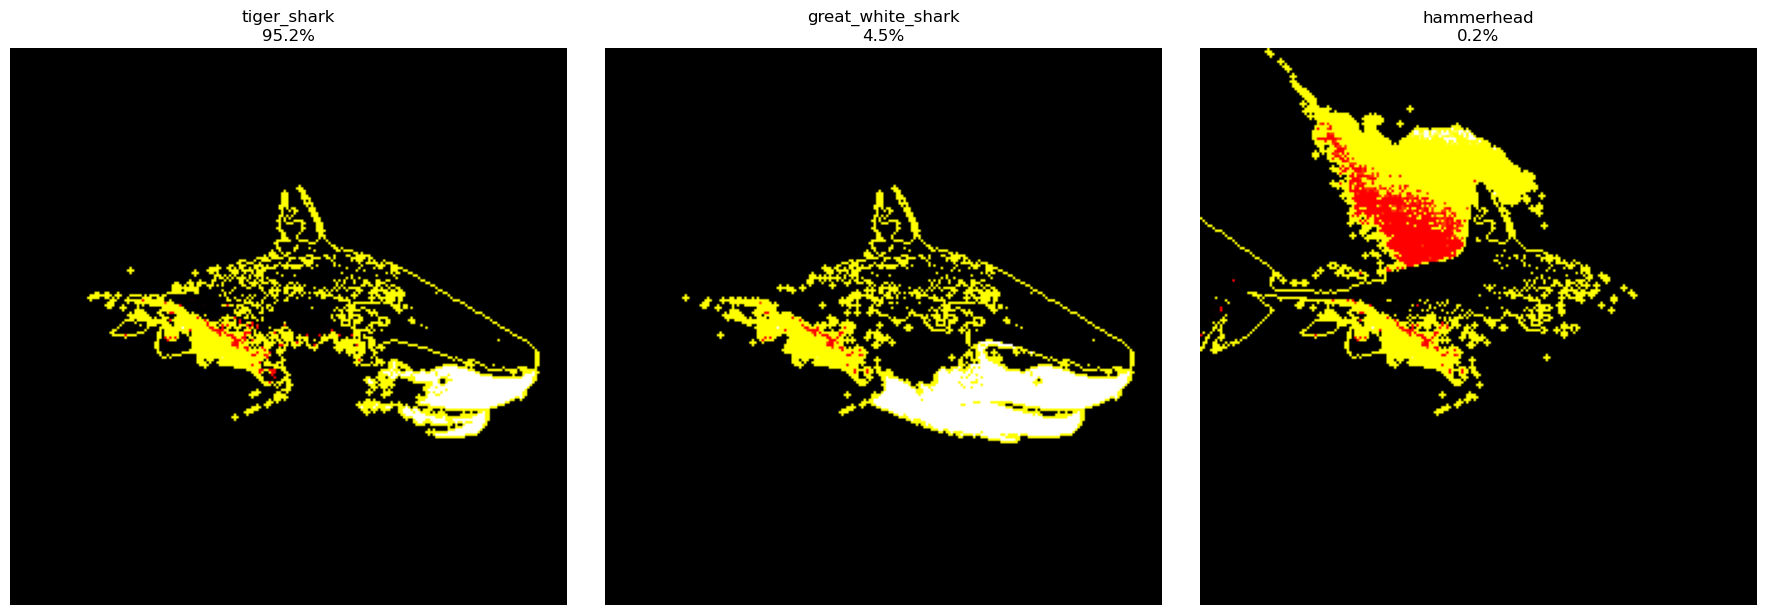

In [25]:
# Create subplots for top 3
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i in range(3):
    class_id = exp.top_labels[i]
    label_name = resnet_decoded[i][1]
    confidence = resnet_decoded[i][2]
    
    # Use the custom function with the axis
    generate_prediction_sample(exp, class_id, ax=axes[i],
                              weight=0.001, 
                              show_positive=True, 
                              hide_background=True)
    
    # Add title with label
    axes[i].set_title(f'{label_name}\n{confidence*100:.1f}%', fontsize=12)

plt.tight_layout()
plt.savefig('ResNet50_Top3')
plt.show()

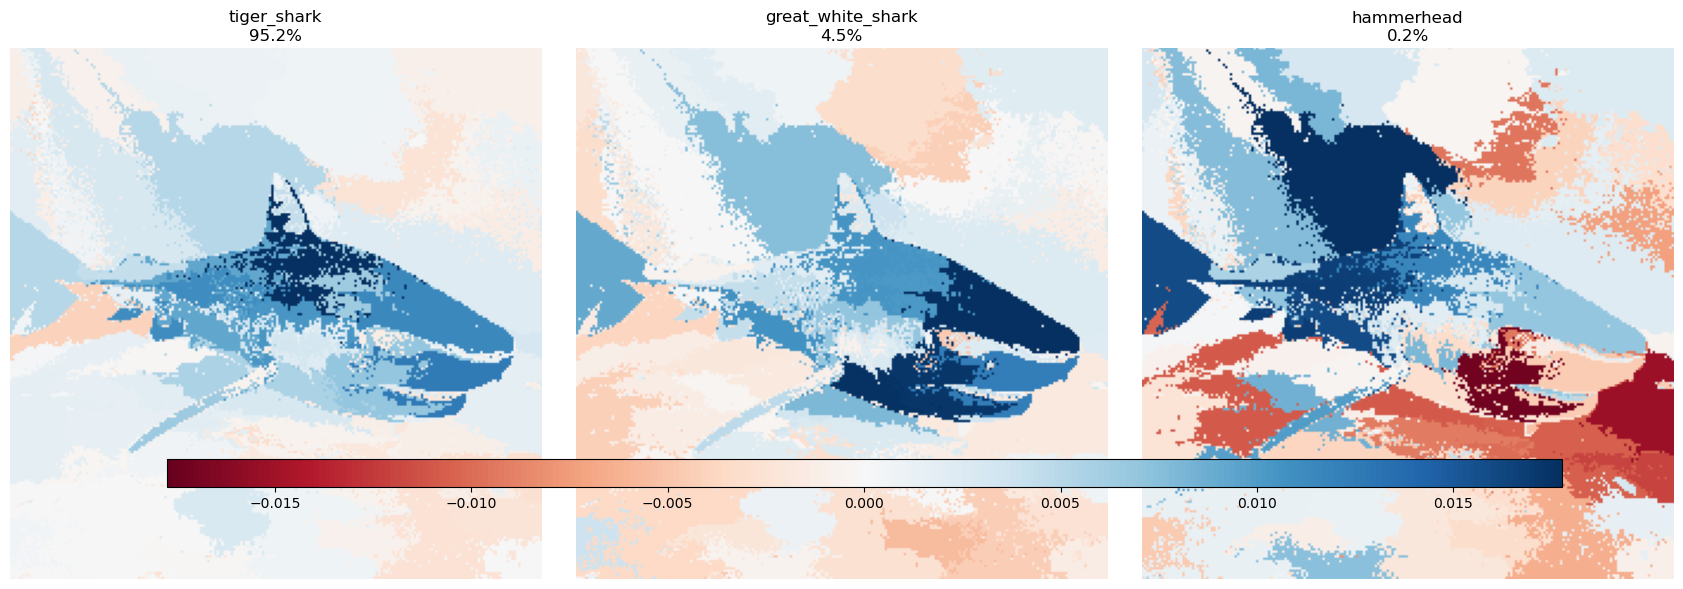

In [26]:
# Create subplots for top 3 heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i in range(3):
    class_id = exp.top_labels[i]
    label_name = resnet_decoded[i][1]
    confidence = resnet_decoded[i][2]
    
    # Use the custom function with the axis
    im = explanation_heatmap(exp, class_id, ax=axes[i])
    
    # Add title with label
    axes[i].set_title(f'{label_name}\n{confidence*100:.1f}%', fontsize=12)

# Add a single colorbar for all subplots
fig.colorbar(im, ax=axes, orientation='horizontal', aspect = 50)

plt.tight_layout()
plt.savefig('resnet_heatmaps')
plt.show()

#### Using VGG16

In [27]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

vgg_model = VGG16(weights='imagenet', include_top=True)

vgg_img = keras.utils.load_img(image_path, target_size=(224, 224))
vgg_img = keras.utils.img_to_array(vgg_img)
vgg_img = np.expand_dims(vgg_img, axis=0)
vgg_img = preprocess_input(vgg_img)

# Get predictions
vgg_predictions = vgg_model.predict(vgg_img)

# Decode top 5 predictions
vgg_decoded = decode_predictions(vgg_predictions, top=5)[0]

# Display results
print("Top 5 predictions for vgg16 model:")
for i, (imagenet_id, label, score) in enumerate(vgg_decoded):
    print(f"{i+1}. {label}: {score*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step
Top 5 predictions for vgg16 model:
1. tiger_shark: 96.43%
2. great_white_shark: 3.46%
3. hammerhead: 0.09%
4. stingray: 0.01%
5. sturgeon: 0.00%


In [28]:
explainer = lime_image.LimeImageExplainer()

In [29]:
exp = explainer.explain_instance(vgg_img[0],
                                 vgg_model.predict,
                                 top_labels=5,
                                 hide_color=0, # color code to mask
                                 num_samples=1000) # number of pertutated images

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 773ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 686ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 658ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 736ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 724ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 699ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 668ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 668ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

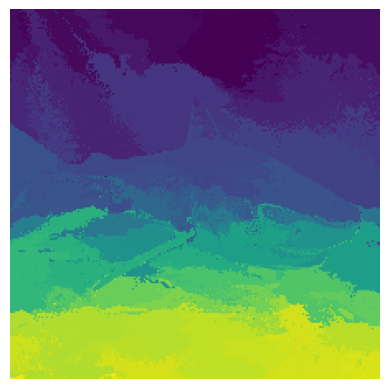

In [30]:
plt.imshow(exp.segments)
plt.axis('off')
plt.savefig('vgg16_segments')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-71.68000030517578..132.22100830078125].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-70.68000030517578..132.22100830078125].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-104.68000030517578..120.06099700927734].


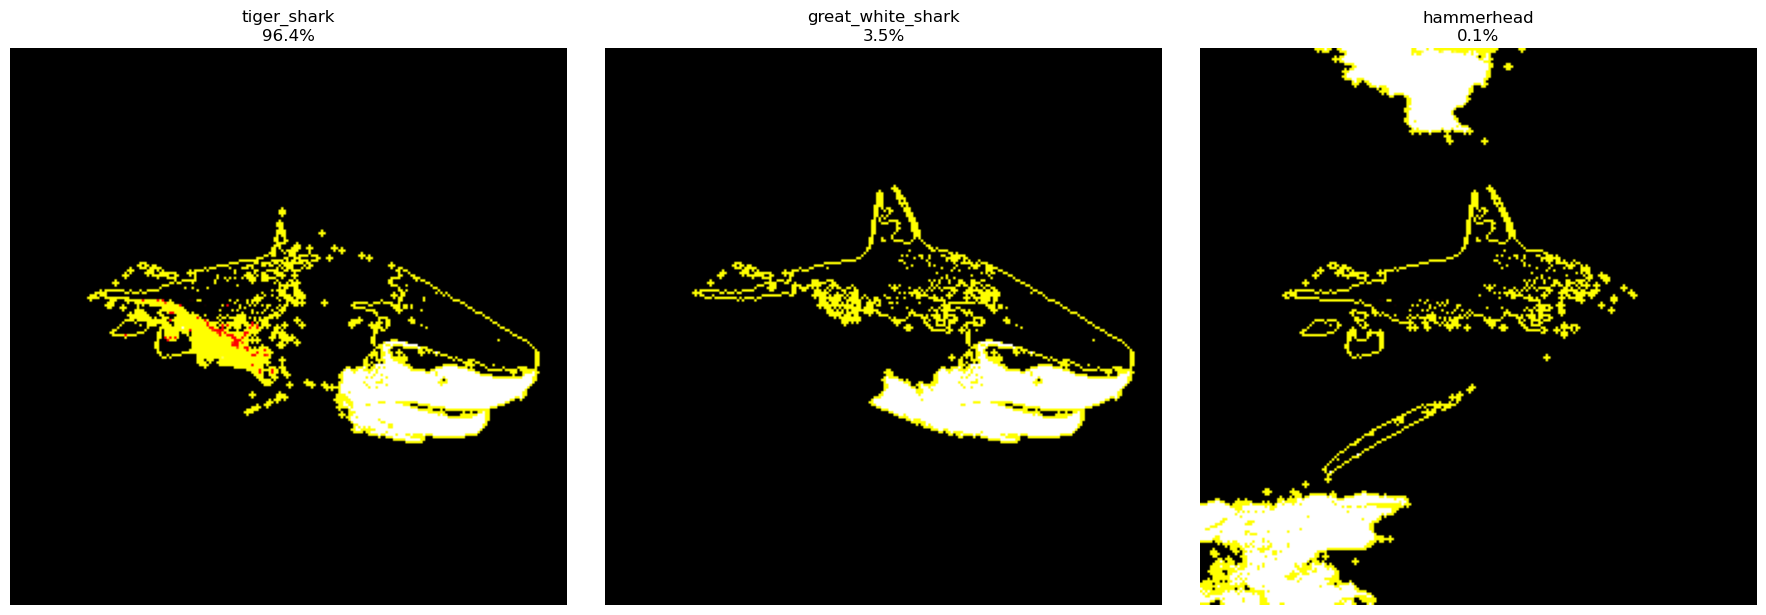

In [31]:
# Create subplots for top 3
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i in range(3):
    class_id = exp.top_labels[i]
    label_name = vgg_decoded[i][1]
    confidence = vgg_decoded[i][2]
    
    # Use the custom function with the axis
    generate_prediction_sample(exp, class_id, ax=axes[i],
                              weight=0.001, 
                              show_positive=True, 
                              hide_background=True)
    
    # Add title with label
    axes[i].set_title(f'{label_name}\n{confidence*100:.1f}%', fontsize=12)

plt.tight_layout()
plt.savefig('vgg16_top3')
plt.show()

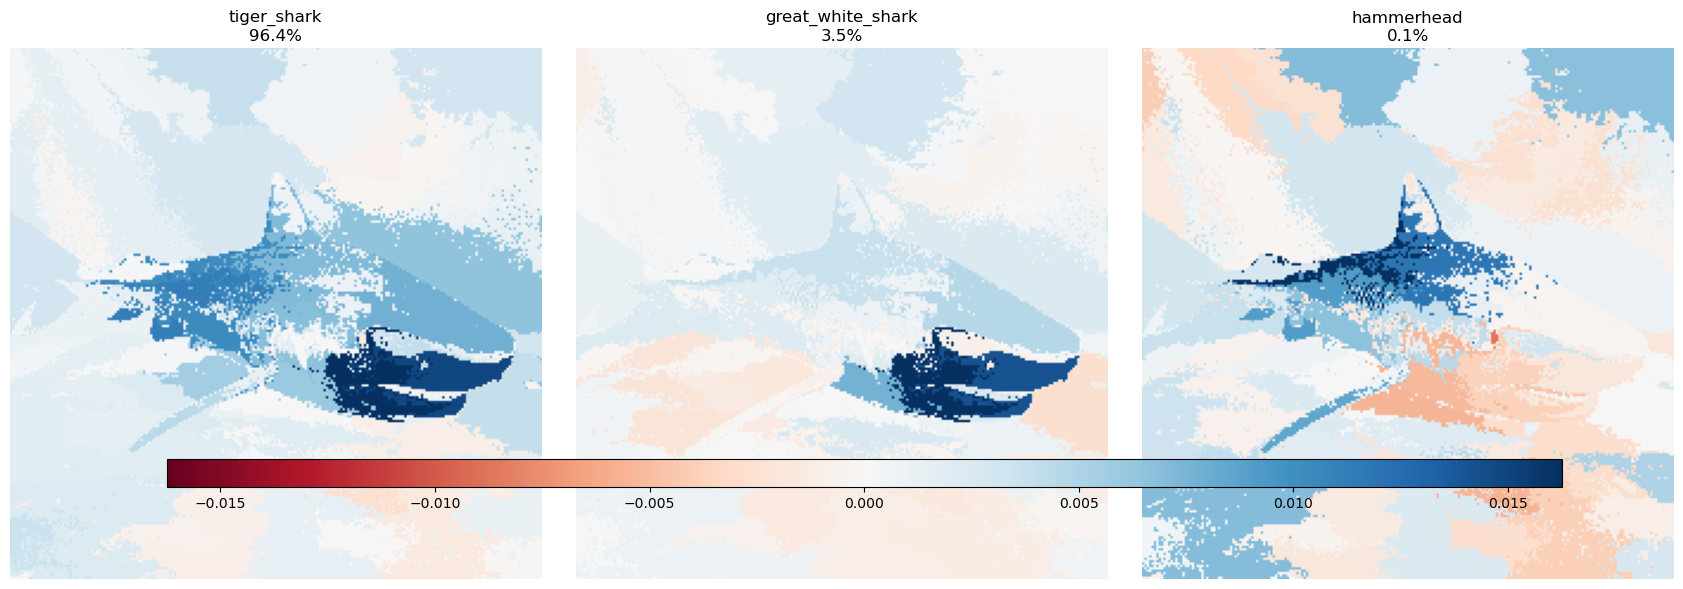

In [32]:
# Create subplots for top 3 heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i in range(3):
    class_id = exp.top_labels[i]
    label_name = vgg_decoded[i][1]
    confidence = vgg_decoded[i][2]
    
    # Use the custom function with the axis
    im = explanation_heatmap(exp, class_id, ax=axes[i])
    
    # Add title with label
    axes[i].set_title(f'{label_name}\n{confidence*100:.1f}%', fontsize=12)

# Add a single colorbar for all subplots
fig.colorbar(im, ax=axes, orientation='horizontal', aspect = 50)

plt.tight_layout()
plt.savefig('vgg16_heat_top3')
plt.show()

#### VGG19

In [33]:
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
import numpy as np

vgg19_model = VGG19(weights='imagenet', include_top=True)

# Get predictions
vgg19_predictions = vgg19_model.predict(vgg_img)

# Decode top 5 predictions
vgg19_decoded = decode_predictions(vgg19_predictions, top=5)[0]

# Display results
print("Top 5 predictions for vgg19 model:")
for i, (imagenet_id, label, score) in enumerate(vgg19_decoded):
    print(f"{i+1}. {label}: {score*100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step
Top 5 predictions for vgg19 model:
1. tiger_shark: 93.59%
2. great_white_shark: 6.26%
3. hammerhead: 0.14%
4. coho: 0.00%
5. sturgeon: 0.00%


In [34]:
explainer = lime_image.LimeImageExplainer()

In [35]:
exp = explainer.explain_instance(vgg_img[0],
                                 vgg19_model.predict,
                                 top_labels=5,
                                 hide_color=0, # color code to mask
                                 num_samples=1000) # number of pertutated images

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 932ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 935ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 892ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 938ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 928ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 885ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 842ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 841ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 847ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 841ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 854ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 842ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 847ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 840ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 850ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 840ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 852ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 869ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 912ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 927ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 931ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 931ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 872ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 878ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 881ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

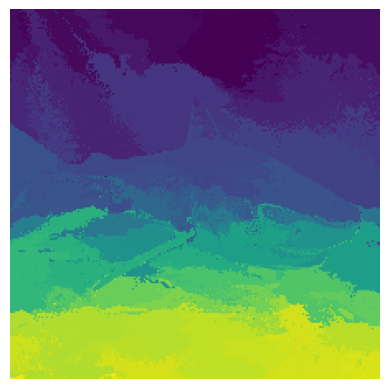

In [36]:
plt.imshow(exp.segments)
plt.axis('off')
plt.savefig('vgg19_segments')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-70.68000030517578..132.22100830078125].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-70.68000030517578..132.22100830078125].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-104.68000030517578..120.06099700927734].


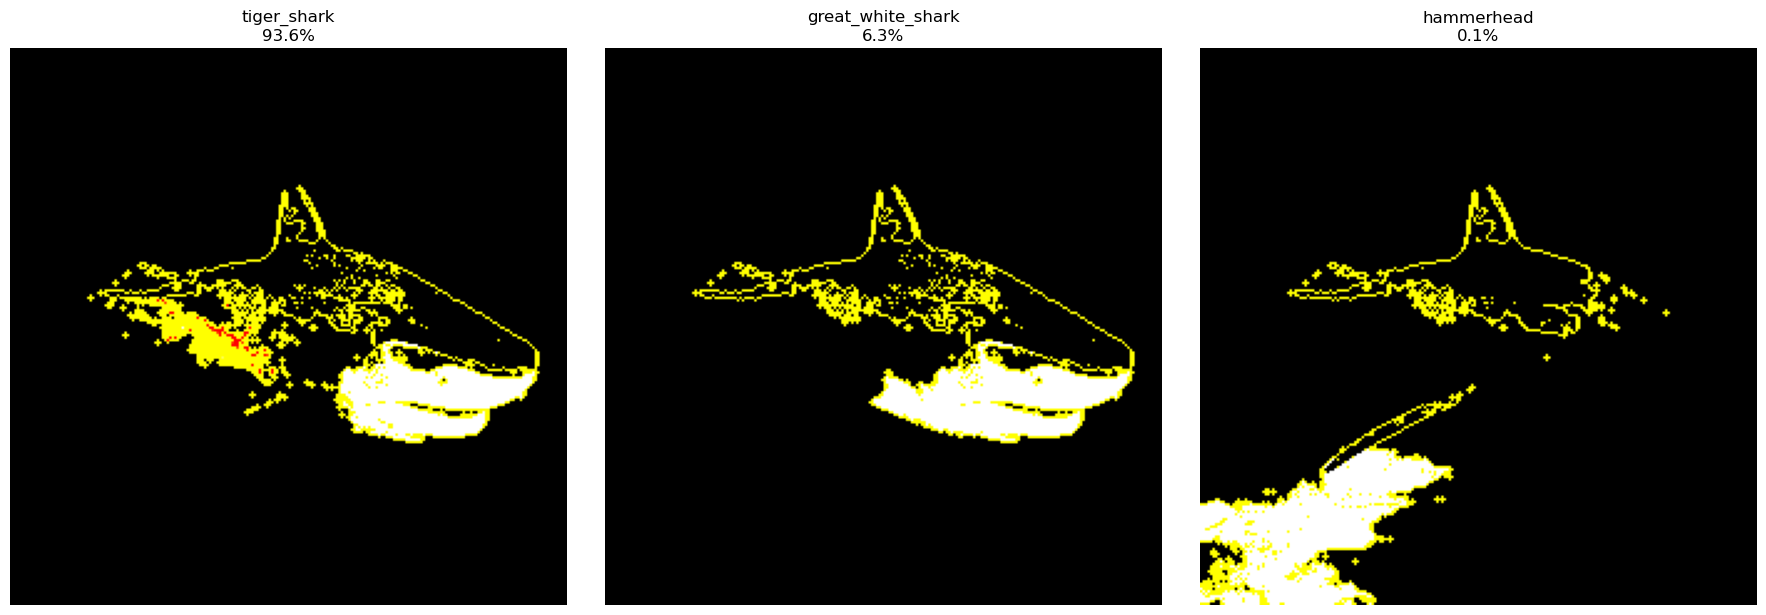

In [37]:
# Create subplots for top 3
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i in range(3):
    class_id = exp.top_labels[i]
    label_name = vgg19_decoded[i][1]
    confidence = vgg19_decoded[i][2]
    
    # Use the custom function with the axis
    generate_prediction_sample(exp, class_id, ax=axes[i],
                              weight=0.001, 
                              show_positive=True, 
                              hide_background=True)
    
    # Add title with label
    axes[i].set_title(f'{label_name}\n{confidence*100:.1f}%', fontsize=12)

plt.tight_layout()
plt.savefig('vgg19_top3')
plt.show()

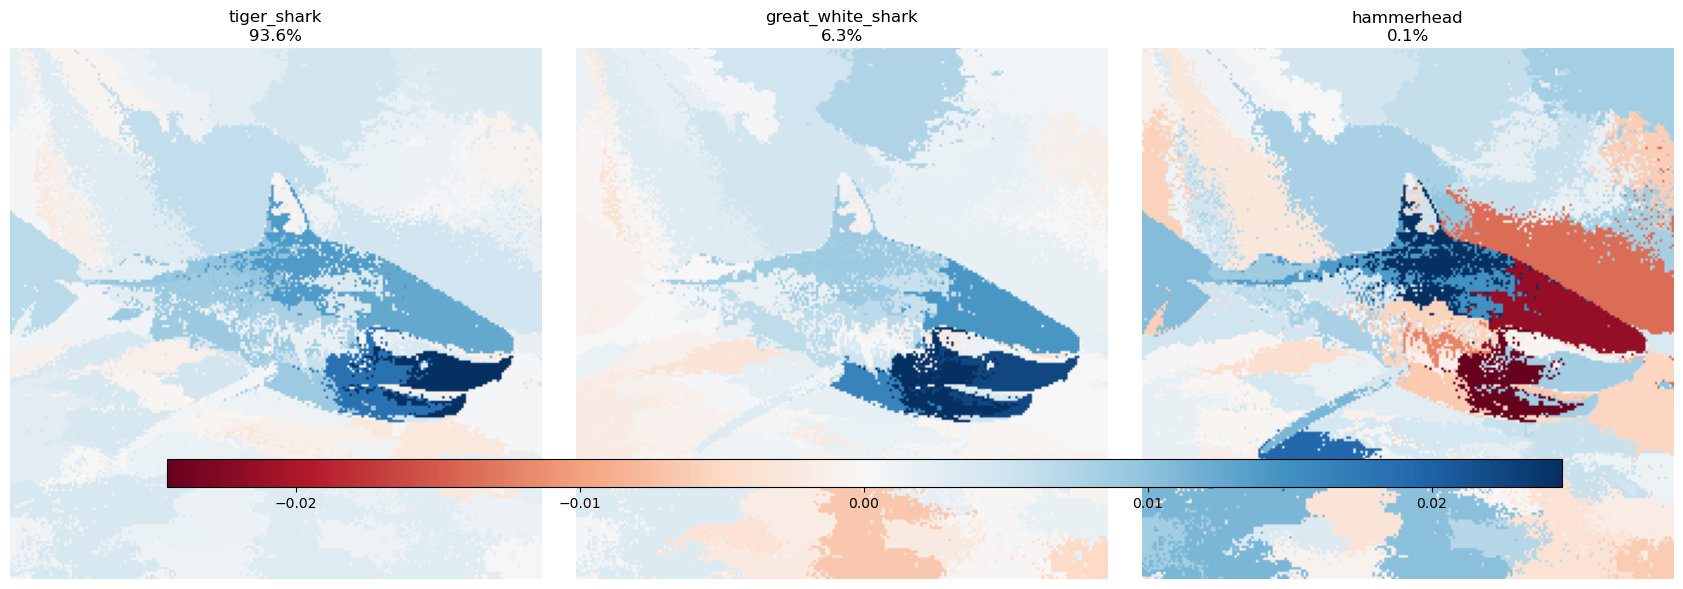

In [38]:
# Create subplots for top 3 heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i in range(3):
    class_id = exp.top_labels[i]
    label_name = vgg19_decoded[i][1]
    confidence = vgg19_decoded[i][2]
    
    # Use the custom function with the axis
    im = explanation_heatmap(exp, class_id, ax=axes[i])
    
    # Add title with label
    axes[i].set_title(f'{label_name}\n{confidence*100:.1f}%', fontsize=12)

# Add a single colorbar for all subplots
fig.colorbar(im, ax=axes, orientation='horizontal', aspect = 50)

plt.tight_layout()
plt.savefig('vgg19_heat_top3')
plt.show()

#### InceptionV3

In [39]:
from keras.applications.inception_v3 import InceptionV3

# Define and initialise a model.
incept_model = InceptionV3(weights="imagenet")

In [40]:
# Get predictions
in_predictions = incept_model.predict(normalized_img)

# Decode top 5 predictions
in_decoded = decode_predictions(in_predictions, top=5)[0]

# Display results
print("Top 5 predictions with InceptionV3 model:")
for i, (imagenet_id, label, score) in enumerate(in_decoded):
    print(f"{i+1}. {label}: {score*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Top 5 predictions with InceptionV3 model:
1. tiger_shark: 97.59%
2. great_white_shark: 0.26%
3. scale: 0.18%
4. hammerhead: 0.04%
5. Australian_terrier: 0.01%


In [41]:
exp = explainer.explain_instance(normalized_img[0],
                                 incept_model.predict,
                                 top_labels=5,
                                 hide_color=0, # color code to mask
                                 num_samples=1000) # number of pertutated images

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

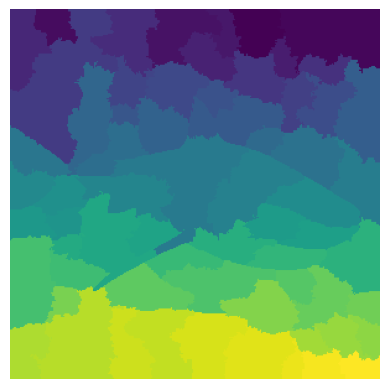

In [42]:
plt.imshow(exp.segments)
plt.axis('off')
plt.savefig('inception_segments')
plt.show()

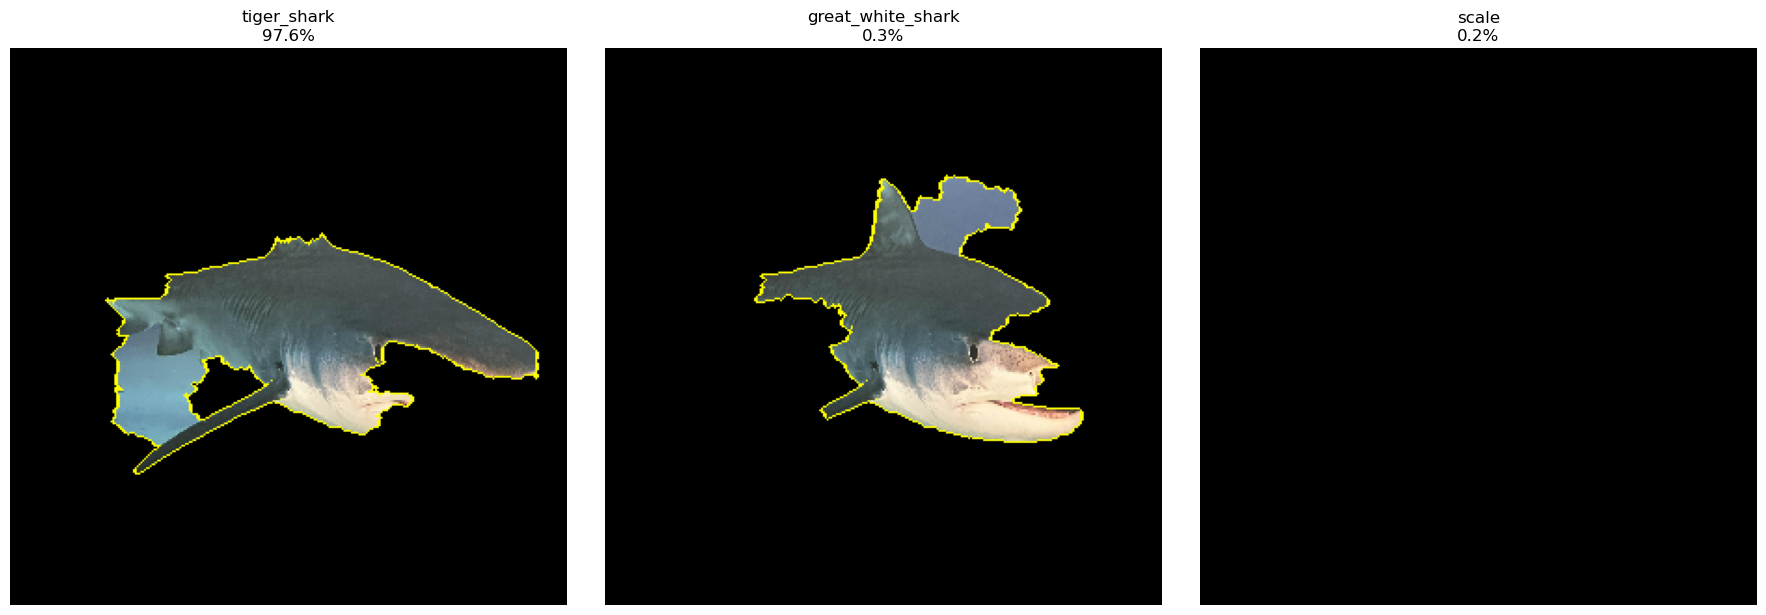

In [43]:
# Create subplots for top 3
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i in range(3):
    class_id = exp.top_labels[i]
    label_name = in_decoded[i][1]
    confidence = in_decoded[i][2]
    
    # Use the custom function with the axis
    generate_prediction_sample(exp, class_id, ax=axes[i],
                              weight=0.001, 
                              show_positive=True, 
                              hide_background=True)
    
    # Add title with label
    axes[i].set_title(f'{label_name}\n{confidence*100:.1f}%', fontsize=12)

plt.tight_layout()
plt.savefig('inception_top3')
plt.show()

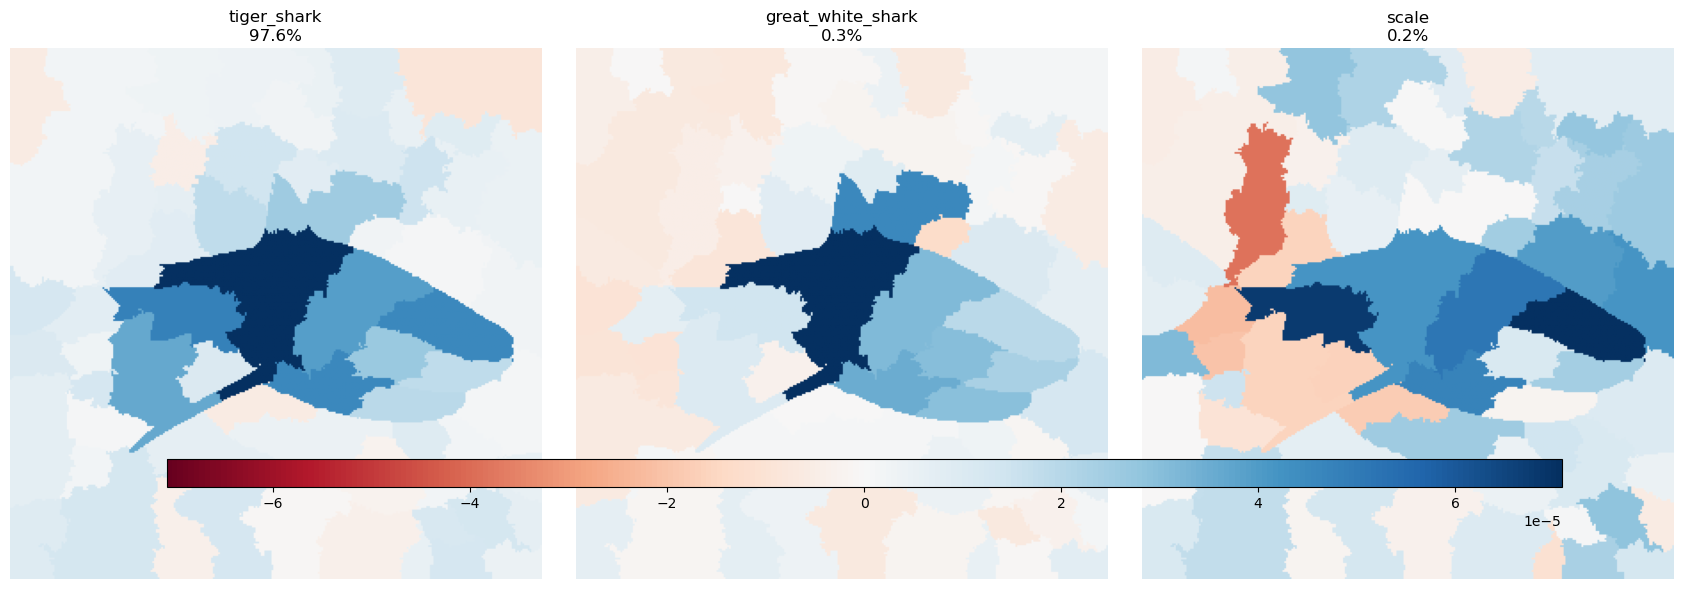

In [44]:
# Create subplots for top 3 heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i in range(3):
    class_id = exp.top_labels[i]
    label_name = in_decoded[i][1]
    confidence = in_decoded[i][2]
    
    # Use the custom function with the axis
    im = explanation_heatmap(exp, class_id, ax=axes[i])
    
    # Add title with label
    axes[i].set_title(f'{label_name}\n{confidence*100:.1f}%', fontsize=12)

# Add a single colorbar for all subplots
fig.colorbar(im, ax=axes, orientation='horizontal', aspect = 50)

plt.tight_layout()
plt.savefig('inception_heat_top3')
plt.show()